In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
import random
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
# for shuffling Dataframe rows
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,87252.0,1.813614,-0.664590,-0.045094,0.472401,-0.820338,0.063000,-0.799774,0.134519,0.969951,...,0.102320,0.299626,0.196751,-0.306316,-0.527436,0.158737,-0.003999,-0.033913,75.90,0
1,137653.0,2.085179,0.438030,-2.362942,1.108901,1.107774,-1.144720,1.045061,-0.516641,-0.603865,...,0.338745,1.181157,-0.280667,-0.270470,0.912059,-0.196488,-0.054088,-0.091348,1.00,0
2,120545.0,-0.664316,-0.014859,1.381047,-0.774979,0.365375,0.659081,-0.291435,0.373304,0.442781,...,0.064569,0.096394,-0.177994,-1.383466,-0.517080,0.586890,-0.041546,0.193614,26.69,0
3,154807.0,2.142184,-0.303400,-1.912031,-1.387678,-0.020039,-1.881688,0.541326,-0.594932,1.413258,...,0.005645,0.360294,0.002389,0.124900,0.403720,-0.135296,-0.035990,-0.071286,6.99,0
4,156167.0,2.107503,-0.145859,-1.622072,-0.030522,0.617532,-0.015912,0.038360,-0.074368,0.373271,...,-0.322108,-0.815797,0.164185,-1.445247,-0.159488,0.268953,-0.073121,-0.084618,1.79,0


In [3]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


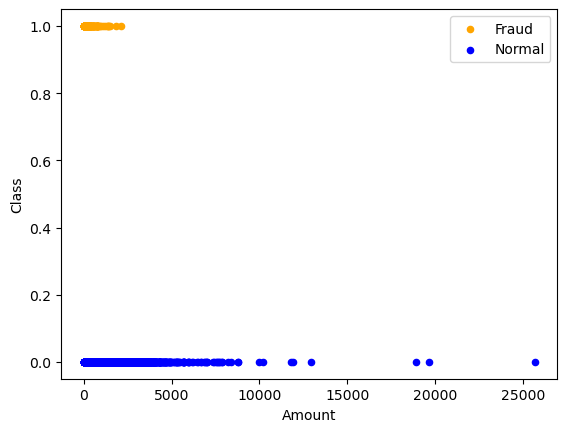

In [4]:
# Scatter plot of both classes
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

In [5]:
df.shape

(284807, 31)

In [6]:
df.ndim

2

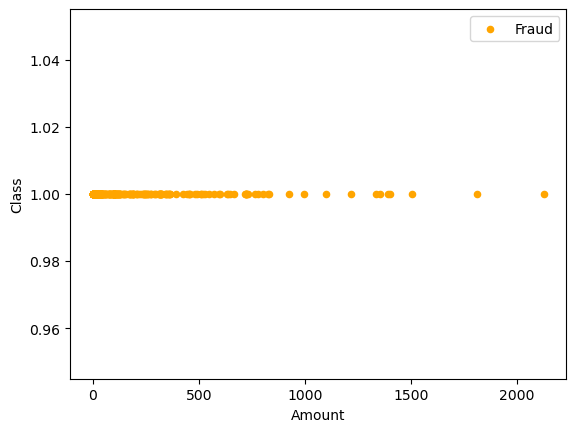

In [7]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

In [8]:
def plot_confusion_matrix(y_test, pred):
    
    y_test_legit = y_test.value_counts()[0]
    y_test_fraud = y_test.value_counts()[1]
    
    cfn_matrix = confusion_matrix(y_test, pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,2,1)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    ax = fig.add_subplot(1,2,2)
    sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    print('---Classification Report---')
    print(classification_report(y_test,pred))

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))




X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 180 0.0018057241455413662
Number of frauds on y_train: 312 0.0016853568419005639


### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import joblib
import numpy as np

# Feature selection
X = df.drop(['Class'], axis=1)
y = df['Class']

# Standardize features
scaler_dbscan = StandardScaler()
X_scaled = scaler_dbscan.fit_transform(X)

# DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Assign predicted labels (-1 as anomaly/fraud, 1 as legit)
predicted = np.where(dbscan_labels == -1, 1, 0)

# Evaluation
print("DBSCAN Classification Report (Label -1 as Fraud):")
print(classification_report(y, predicted))

# Save model and scaler
joblib.dump(dbscan, "dbscan_model.pkl")
joblib.dump(scaler_dbscan, "scaler_dbscan.pkl")


C:\Users\parir\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\parir\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\parir\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\parir\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\parir\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


In [ ]:

# Build and train a simple deep learning model
model_dl = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dl.fit(X_train, y_train, epochs=10, batch_size=2048, validation_split=0.2)


In [ ]:

# Evaluate on test set
dl_preds = (model_dl.predict(X_test) > 0.5).astype("int32")
print("Deep Learning Model Evaluation:")
print(classification_report(y_test, dl_preds))


In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Assume X_train is defined
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save model using newer Keras format
model_dl.save("fraud_dl_model.keras")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")
